In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
emotion_df=pd.read_csv('Emotions.csv')
violence_df=pd.read_csv('Violence.csv')
hate_df=pd.read_csv('Hatespeech.csv')

In [3]:
emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [5]:
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
emotion_df.drop(columns=['Unnamed: 0'], inplace=True)
violence_df.drop(columns=['Tweet_ID'], inplace=True)
hate_df=hate_df[['tweet','class']]

In [7]:
emotion_df.columns,violence_df.columns,hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['tweet', 'class'], dtype='object'))

In [8]:
violence_df.rename(columns={'tweet':'text','type':'label'},inplace=True)
hate_df.rename(columns={'tweet':'text','class':'label'},inplace=True)

In [9]:
emotion_df.columns,violence_df.columns,hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

In [10]:
emotion_df.isna().sum(), violence_df.isna().sum(), hate_df.isna().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [11]:
emotion_df.shape, violence_df.shape, hate_df.shape

((416809, 2), (39650, 2), (24783, 2))

In [12]:
emotion_df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [13]:
violence_df['label'].value_counts()

label
sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: count, dtype: int64

In [14]:
hate_df['label'].value_counts()

label
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [15]:
e_df=pd.DataFrame()
for i in  range(len(emotion_df['label'].unique())):
    subset=emotion_df[emotion_df['label']==i].sample(n=2000,random_state=42)
    e_df=pd.concat([e_df,subset])

In [16]:
e_df.shape

(12000, 2)

In [17]:
emotion_df=e_df.copy()

In [18]:
emotion_df['label'].value_counts()

label
0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64

In [19]:
sexual_violence=violence_df[violence_df['label']=='sexual_violence'].sample(n=4998, random_state=42)
violence_df=violence_df[violence_df['label']!='sexual_violence']

In [20]:
violence_df=pd.concat([violence_df,sexual_violence], axis=0)

In [21]:
violence_df['label'].value_counts()

label
Physical_violence               5946
sexual_violence                 4998
emotional_violence               651
economic_violence                217
Harmful_Traditional_practice     188
Name: count, dtype: int64

In [22]:
offensive_speech=hate_df[hate_df['label']==1].sample(n=6407, random_state=42)
hate_df=hate_df[hate_df['label']!=1]

In [23]:
hate_df=pd.concat([offensive_speech,hate_df], axis=0)

In [24]:
hate_df['label'].value_counts()

label
1    6407
2    4163
0    1430
Name: count, dtype: int64

In [25]:
hate_df.shape,emotion_df.shape, violence_df.shape

((12000, 2), (12000, 2), (12000, 2))

In [26]:
label_encoder=LabelEncoder()
violence_df['label']=label_encoder.fit_transform(violence_df['label'])

In [27]:
violence_df

,text,label
6,"My Husband Beats Me Frequently, Wife Tells Cou...",1
29,"Best thing for me to do, is remain silent when...",1
30,"My husband will never beat me, Bambam denies r...",1
33,"theyre like, i just wanna be a baby maker with...",1
35,"I was in England for a week, the longest I’ve ...",1
...,...,...
25368,i was 13 and had just been raped. the police t...,4
13942,So bad.She/he don't know how blessed they are ...,4
34704,I was Hide and he was Yoshi. We were Hideyoshi...,4
18626,It actually sickens me that he's so smug abt '...,4


In [28]:
violence_df['label'].unique()

array([1, 3, 0, 2, 4])

In [29]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ambik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [30]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ambik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ambik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
stop_words=set(stopwords.words('english'))

In [32]:
len(stop_words)

179

In [33]:
def remove_stopwords(text):
    all_words=nltk.word_tokenize(text)
    filtered_words=[word for word in all_words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [34]:
emotion_df['text']=emotion_df['text'].apply(remove_stopwords)
violence_df['text']=violence_df['text'].apply(remove_stopwords)
hate_df['text']=hate_df['text'].apply(remove_stopwords)

In [35]:
emotion_df.head()

,text,label
133243,ive learned surround women lift leave feeling ...,0
88501,already feel crappy upset situation doesnt help,0
131379,feel like lost mourned moved past tears relati...,0
148369,could write whole lot im feeling crappy dont t...,0
134438,always seem feel inadequate,0


In [36]:
tokenizer=Tokenizer()

In [37]:
tokenizer.fit_on_texts(pd.concat([emotion_df['text'],violence_df['text'],hate_df['text']]))

In [38]:
emotion_sequence=tokenizer.texts_to_sequences(emotion_df['text'])
violence_sequence=tokenizer.texts_to_sequences(violence_df['text'])
hate_sequence=tokenizer.texts_to_sequences(hate_df['text'])

In [39]:
emotion_df['text'].iloc[2]

'feel like lost mourned moved past tears relationship'

In [40]:
emotion_sequence[2:3]

[[1, 5, 321, 11854, 1207, 422, 1093, 385]]

In [41]:
max_length=50
emotion_padded=pad_sequences(emotion_sequence,maxlen=max_length,padding='post')
violence_padded=pad_sequences(violence_sequence,maxlen=max_length,padding='post')
hate_padded=pad_sequences(hate_sequence,maxlen=max_length,padding='post')

In [42]:
emotion_padded[2:3]

array([[    1,     5,   321, 11854,  1207,   422,  1093,   385,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]])

In [43]:
emotion_labels=np.array(emotion_df['label'])
violence_labels=np.array(violence_df['label'])
hate_labels=np.array(hate_df['label'])

In [44]:
hate_input=hate_padded
violence_input=violence_padded
emotion_input=emotion_padded

In [45]:
emotion_input_layer=keras.layers.Input(shape=(max_length,),name='emotion_input')
violence_input_layer=keras.layers.Input(shape=(max_length,),name='violence_input')
hate_input_layer=keras.layers.Input(shape=(max_length,),name='hate_input')

In [46]:
embedding_layer=keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=128)

In [47]:
emotion_embedding=embedding_layer(emotion_input_layer)
violence_embedding=embedding_layer(violence_input_layer)
hate_embedding=embedding_layer(hate_input_layer)

In [48]:
shared_lstm=keras.layers.LSTM(64,return_sequences=True)

In [49]:
emotion_lstm=shared_lstm(emotion_embedding)
violence_lstm=shared_lstm(violence_embedding)
hate_lstm=shared_lstm(hate_embedding)

In [50]:
shared_pooling=keras.layers.GlobalAveragePooling1D()
shared_dropout=keras.layers.Dropout(0.5)

In [51]:
emotion_features=shared_dropout(shared_pooling(emotion_lstm))
violence_features=shared_dropout(shared_pooling(violence_lstm))
hate_features=shared_dropout(shared_pooling(hate_lstm))

In [52]:
len(emotion_df['label'].unique()), len(violence_df['label'].unique()), len(hate_df['label'].unique())

(6, 5, 3)

In [53]:
emotion_output=keras.layers.Dense(6,activation='softmax', name='emotion_output')(emotion_features)
violence_output=keras.layers.Dense(5,activation='softmax', name='violence_output')(violence_features)
hate_output=keras.layers.Dense(3,activation='softmax',name='hate_output')(hate_features)

In [54]:
model=keras.models.Model(inputs=[emotion_input_layer,violence_input_layer,hate_input_layer],
                       outputs=[emotion_output,violence_output,hate_output])

model.compile(optimizer='adam',
             loss={'emotion_output':'sparse_categorical_crossentropy',
                  'violence_output':'sparse_categorical_crossentropy',
                  'hate_output':'sparse_categorical_crossentropy'
                  },
             metrics={'emotion_output':'accuracy',
                     'violence_output':'accuracy',
                     'hate_output':'accuracy'
                     })

In [55]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 128)   │  5,350,656 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violence_input[0… │
│                     │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 50, 64)    │     49,408 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0],  │
│                     │                   │            │ embedding[2][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ lstm[0][0],       │
│ (GlobalAveragePool… │                   │            │ lstm[1][0],       │
│                     │                   │            │ lstm[2][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ global_average_p… │
│                     │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        390 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_output     │ (None, 5)         │        325 │ dropout[1][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_output (Dense) │ (None, 3)         │        195 │ dropout[2][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,400,974 (20.60 MB)

 Trainable params: 5,400,974 (20.60 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.fit(x={'emotion_input':emotion_input,
            'violence_input':violence_input,
            'hate_input':hate_input
            },
         y={'emotion_output':emotion_labels,
           'violence_output':violence_labels,
           'hate_output':hate_labels
           },
         epochs=10,
         batch_size=4
         )

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 205s 66ms/step - emotion_output_accuracy: 0.2045 - emotion_output_loss: 1.7784 - hate_output_accuracy: 0.6755 - hate_output_loss: 0.7929 - loss: 2.9813 - violence_output_accuracy: 0.8522 - violence_output_loss: 0.4100
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 197s 66ms/step - emotion_output_accuracy: 0.7789 - emotion_output_loss: 0.6563 - hate_output_accuracy: 0.8590 - hate_output_loss: 0.3983 - loss: 1.1265 - violence_output_accuracy: 0.9772 - violence_output_loss: 0.0720
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 198s 66ms/step - emotion_output_accuracy: 0.9360 - emotion_output_loss: 0.2131 - hate_output_accuracy: 0.9225 - hate_output_loss: 0.2153 - loss: 0.4419 - violence_output_accuracy: 0.9972 - violence_output_loss: 0.0135
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 637s 212ms/step - emotion_output_accuracy: 0.9637 - emotion_output_loss: 0.1136 - hate_output_accuracy: 0.9689 - hate_output_loss: 0.0907 - loss: 0.2093 - violence_output_accurac

In [57]:
prediction=model.predict({'emotion_input':emotion_input,
                         'violence_input':violence_input,
                         'hate_input':hate_input})

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


In [58]:
prediction

[array([[9.9996054e-01, 3.1647476e-06, 2.3832699e-06, 2.7387054e-05,
         6.0501011e-06, 3.8934502e-07],
        [9.9997282e-01, 1.7291445e-06, 1.6868256e-06, 2.2703931e-05,
         9.5522671e-07, 1.4613086e-07],
        [9.9998808e-01, 1.9209997e-06, 1.4844335e-06, 6.1402202e-06,
         2.3122298e-06, 1.3640405e-07],
        ...,
        [7.4409759e-06, 4.6780515e-05, 4.5685924e-06, 9.8277860e-06,
         5.2035780e-04, 9.9941111e-01],
        [5.2915982e-07, 7.4547671e-07, 3.1237857e-07, 1.0529471e-06,
         1.4030476e-05, 9.9998331e-01],
        [1.7617518e-05, 3.5965793e-05, 1.9162286e-05, 2.3566823e-05,
         1.8169890e-04, 9.9972194e-01]], dtype=float32),
 array([[1.4817855e-11, 1.0000000e+00, 1.6275935e-11, 1.0950333e-10,
         2.8234467e-11],
        [1.8649947e-08, 9.9999988e-01, 3.4136247e-09, 1.5056615e-07,
         1.6080234e-08],
        [1.4532672e-10, 1.0000000e+00, 9.2001816e-11, 3.3291961e-10,
         3.0484126e-10],
        ...,
        [2.6368792e-0

In [59]:
emotion_pred=np.argmax(prediction[0],axis=1)
violence_pred=np.argmax(prediction[1],axis=1)
hate_pred=np.argmax(prediction[2],axis=1)

In [142]:
def plot_cm(true,pred,title,labels):
    cf=confusion_matrix(true,pred,normalize='true')
    plt.figure(figsize=(7,6))
    sns.heatmap(cf,annot=True,cmap='Blues', xticklabels=labels,yticklabels=labels)
    plt.title(title)
    plt.ylabel('Actul')
    plt.xlabel('Prediction')

In [144]:
emotion_labels_text=['Sadness','Joy','Love','Anger','Fear','Surprise']
violence_labels_text=['Sexual_violence','Physical_violence','Emotional_violence','Harmful_traditional_pratices','Economic_violence']
hate_labels_text=['Offensive Speech','Neither','Hate Speech']

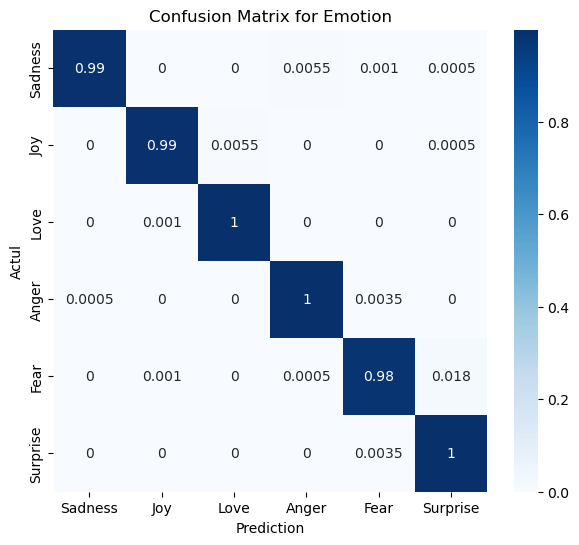

In [146]:
plot_cm(emotion_labels,emotion_pred,'Confusion Matrix for Emotion',emotion_labels_text)

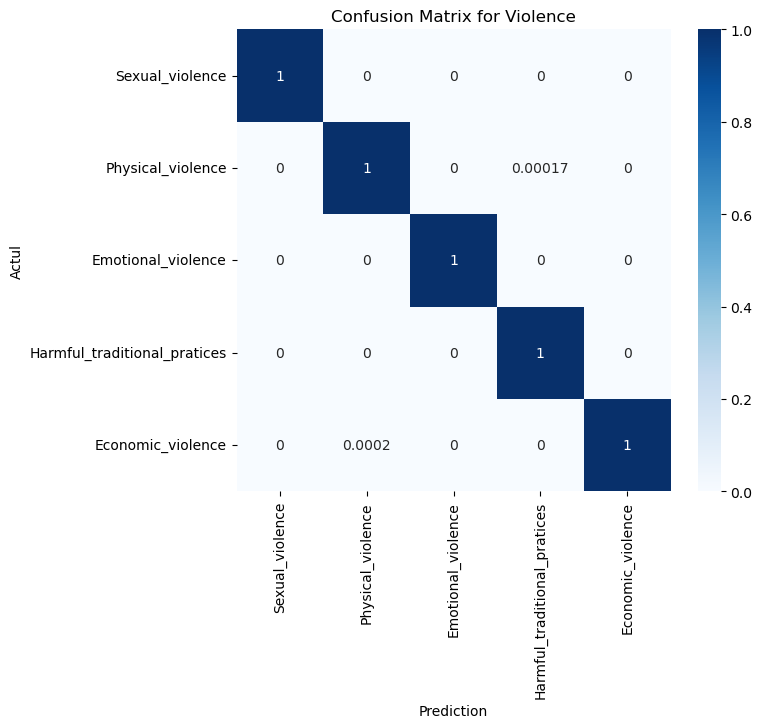

In [148]:
plot_cm(violence_labels,violence_pred,'Confusion Matrix for Violence',violence_labels_text)

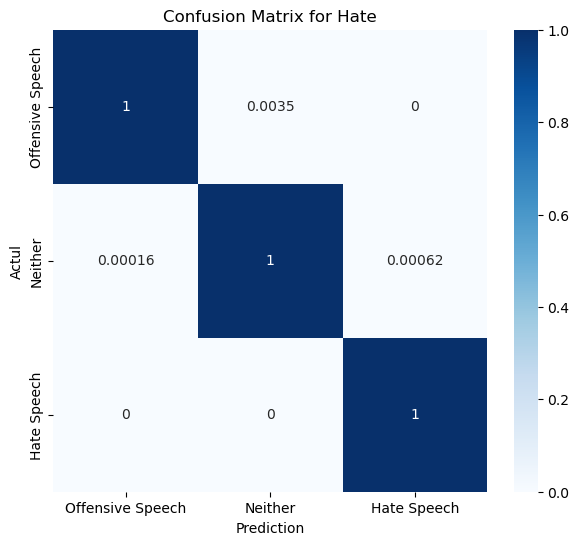

In [150]:
plot_cm(hate_labels,hate_pred,'Confusion Matrix for Hate',hate_labels_text)